# Radar Mosiac Plotting

This notebook is an example of downloading, gridding, and plotting radar mosiacs

In [12]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

import pyart

import cartopy.crs as ccrs
import cartopy.feature as cfeature

import boto3
from botocore import UNSIGNED
from botocore.config import Config

from datetime import datetime, timedelta
from netCDF4 import Dataset

import glob
import os

import pandas as pd

import numpy as np

In [32]:
#set date and location bounds
#set time to plot (no leading zeros)
year  = 2021
month = 12
day   = 10
hour  = 18
minute   = 0
    
lat_min = 30
lat_max = 50
lon_min = -115
lon_max = -75

In [33]:
#read in radar_list
df = pd.read_csv('radar_list.txt',delimiter='|',header=None,
                 names=['radar_name','radar_name2','lat','lon','elv','code','state','location'],
                 dtype={'lat':float, 'lon':float, 'elv':float})

df.radar_name = df.radar_name.str.upper()

#remove if not within 1 deg of area to be plotted
#1 deg is about 100 km
to_del = np.where( (df.lat>lat_max+1) | (df.lat<lat_min-1) |
                   (df.lon>lon_max+1) | (df.lon<lon_min-1) ) 

df.drop(to_del[0],inplace=True)

In [65]:
#grab data for requested date and all radars within bounds
dt = datetime(year,month,day,hour,minute)

for file in glob.glob('radar_data/*'):
        os.remove(file)

noaa_bucket = 'noaa-nexrad-level2'

s3 = boto3.resource('s3', config=Config(signature_version=UNSIGNED))
s3_client = boto3.client('s3', config=Config(signature_version=UNSIGNED))
bucket = s3.Bucket(noaa_bucket)

start = datetime.utcnow()

for radar in df.radar_name:
    if radar[0] == "T":
        continue
    path = f'{dt:%Y}/{dt:%m}/{dt:%d}/{radar}/{radar}{dt:%Y}{dt:%m}{dt:%d}_{dt:%H}'
    objs = bucket.objects.filter(Prefix=path)
    files = np.array([i.key for i in objs])
    inds_keep = []
    for i, s in enumerate(files):
        if "_MDM" in s:
            pass
        else: 
            inds_keep.append(i)
    files = files[inds_keep]
    
    
    if len(files) == 0:
        continue
    file_time = np.array([datetime.strptime(i[20:35],'%Y%m%d_%H%M%S') for i in files])
    delta_t = np.array([abs((dt - i)).seconds for i in file_time])
    file = files[np.argmin(delta_t)]
    outfile = file.split('/')[-1]
    
    print(f'Downloading {radar}')
    s3_client.download_file(noaa_bucket,file,f'./radar_data/{outfile}')
    print(f' Total time elapsed: {(datetime.utcnow()-start).seconds} seconds')
#file_time = np.array([datetime.strptime(i[
#start_times = np.array([datetime.strptime(i[52:65],'%Y%j%H%M%S') for i in files])
#end_times = np.array([datetime.strptime(i[68:81],'%Y%j%H%M%S') for i in files])
#print(files)
#delta_t = np.array([abs((dt - i)).seconds for i in start_times])
#file = files[np.argmin(delta_t)]

#if os.path.exists("tmp.nc"):
#    os.remove("tmp.nc")

    
#print(file)
#s3_client.download_file(noaa_bucket, file, 'tmp.nc')
#bucket/2024/01/01/KAMX/KAMX20240101_004714_V06

#path = f'{prod}/{dt:%Y}/{dt:%j}/{dt:%H}/OR_{prod}-M6C{channel}_'
#objs = bucket.objects.filter(Prefix=path)
#files = np.array([i.key for i in objs])

#if len(files) == 0:
#    path = f'{prod}/{dt:%Y}/{dt:%j}/{dt:%H}/OR_{prod}-M3C{channel}_'
#    objs = bucket.objects.filter(Prefix=path)
#    files = np.array([i.key for i in objs])

 Total time elapsed: 4 seconds
 Total time elapsed: 5 seconds
 Total time elapsed: 6 seconds
 Total time elapsed: 8 seconds
 Total time elapsed: 9 seconds
 Total time elapsed: 12 seconds
 Total time elapsed: 13 seconds
 Total time elapsed: 14 seconds
 Total time elapsed: 15 seconds
 Total time elapsed: 17 seconds
 Total time elapsed: 20 seconds
 Total time elapsed: 22 seconds
 Total time elapsed: 25 seconds
 Total time elapsed: 26 seconds
 Total time elapsed: 28 seconds
 Total time elapsed: 29 seconds
 Total time elapsed: 30 seconds
 Total time elapsed: 32 seconds
 Total time elapsed: 35 seconds
 Total time elapsed: 37 seconds
 Total time elapsed: 39 seconds
 Total time elapsed: 41 seconds
 Total time elapsed: 42 seconds
 Total time elapsed: 44 seconds
 Total time elapsed: 46 seconds
 Total time elapsed: 48 seconds
 Total time elapsed: 49 seconds
 Total time elapsed: 51 seconds
 Total time elapsed: 53 seconds
 Total time elapsed: 54 seconds
 Total time elapsed: 55 seconds
 Total time e

In [77]:
radar_files = glob.glob('./radar_data/*')
radar_data = [None] * len(radar_files)

for i in range(len(radar_files)):
    print(f'Reading radar {i+1} of {len(radar_files)}')
    radar_data[i] = pyart.io.read_nexrad_archive(radar_files[i])
    
    

Reading radar 1 of 110
Reading radar 2 of 110
Reading radar 3 of 110
Reading radar 4 of 110
Reading radar 5 of 110
Reading radar 6 of 110
Reading radar 7 of 110
Reading radar 8 of 110
Reading radar 9 of 110
Reading radar 10 of 110
Reading radar 11 of 110
Reading radar 12 of 110
Reading radar 13 of 110
Reading radar 14 of 110
Reading radar 15 of 110
Reading radar 16 of 110
Reading radar 17 of 110
Reading radar 18 of 110
Reading radar 19 of 110
Reading radar 20 of 110
Reading radar 21 of 110
Reading radar 22 of 110
Reading radar 23 of 110
Reading radar 24 of 110
Reading radar 25 of 110
Reading radar 26 of 110
Reading radar 27 of 110
Reading radar 28 of 110
Reading radar 29 of 110
Reading radar 30 of 110
Reading radar 31 of 110
Reading radar 32 of 110
Reading radar 33 of 110
Reading radar 34 of 110
Reading radar 35 of 110
Reading radar 36 of 110
Reading radar 37 of 110
Reading radar 38 of 110
Reading radar 39 of 110
Reading radar 40 of 110
Reading radar 41 of 110
Reading radar 42 of 110
R

Plotting radar 1 of 110
Plotting radar 2 of 110
Plotting radar 3 of 110
Plotting radar 4 of 110
Plotting radar 5 of 110
Plotting radar 6 of 110
Plotting radar 7 of 110
Plotting radar 8 of 110
Plotting radar 9 of 110
Plotting radar 10 of 110
Plotting radar 11 of 110
Plotting radar 12 of 110
Plotting radar 13 of 110
Plotting radar 14 of 110
Plotting radar 15 of 110
Plotting radar 16 of 110
Plotting radar 17 of 110
Plotting radar 18 of 110
Plotting radar 19 of 110
Plotting radar 20 of 110
Plotting radar 21 of 110
Plotting radar 22 of 110


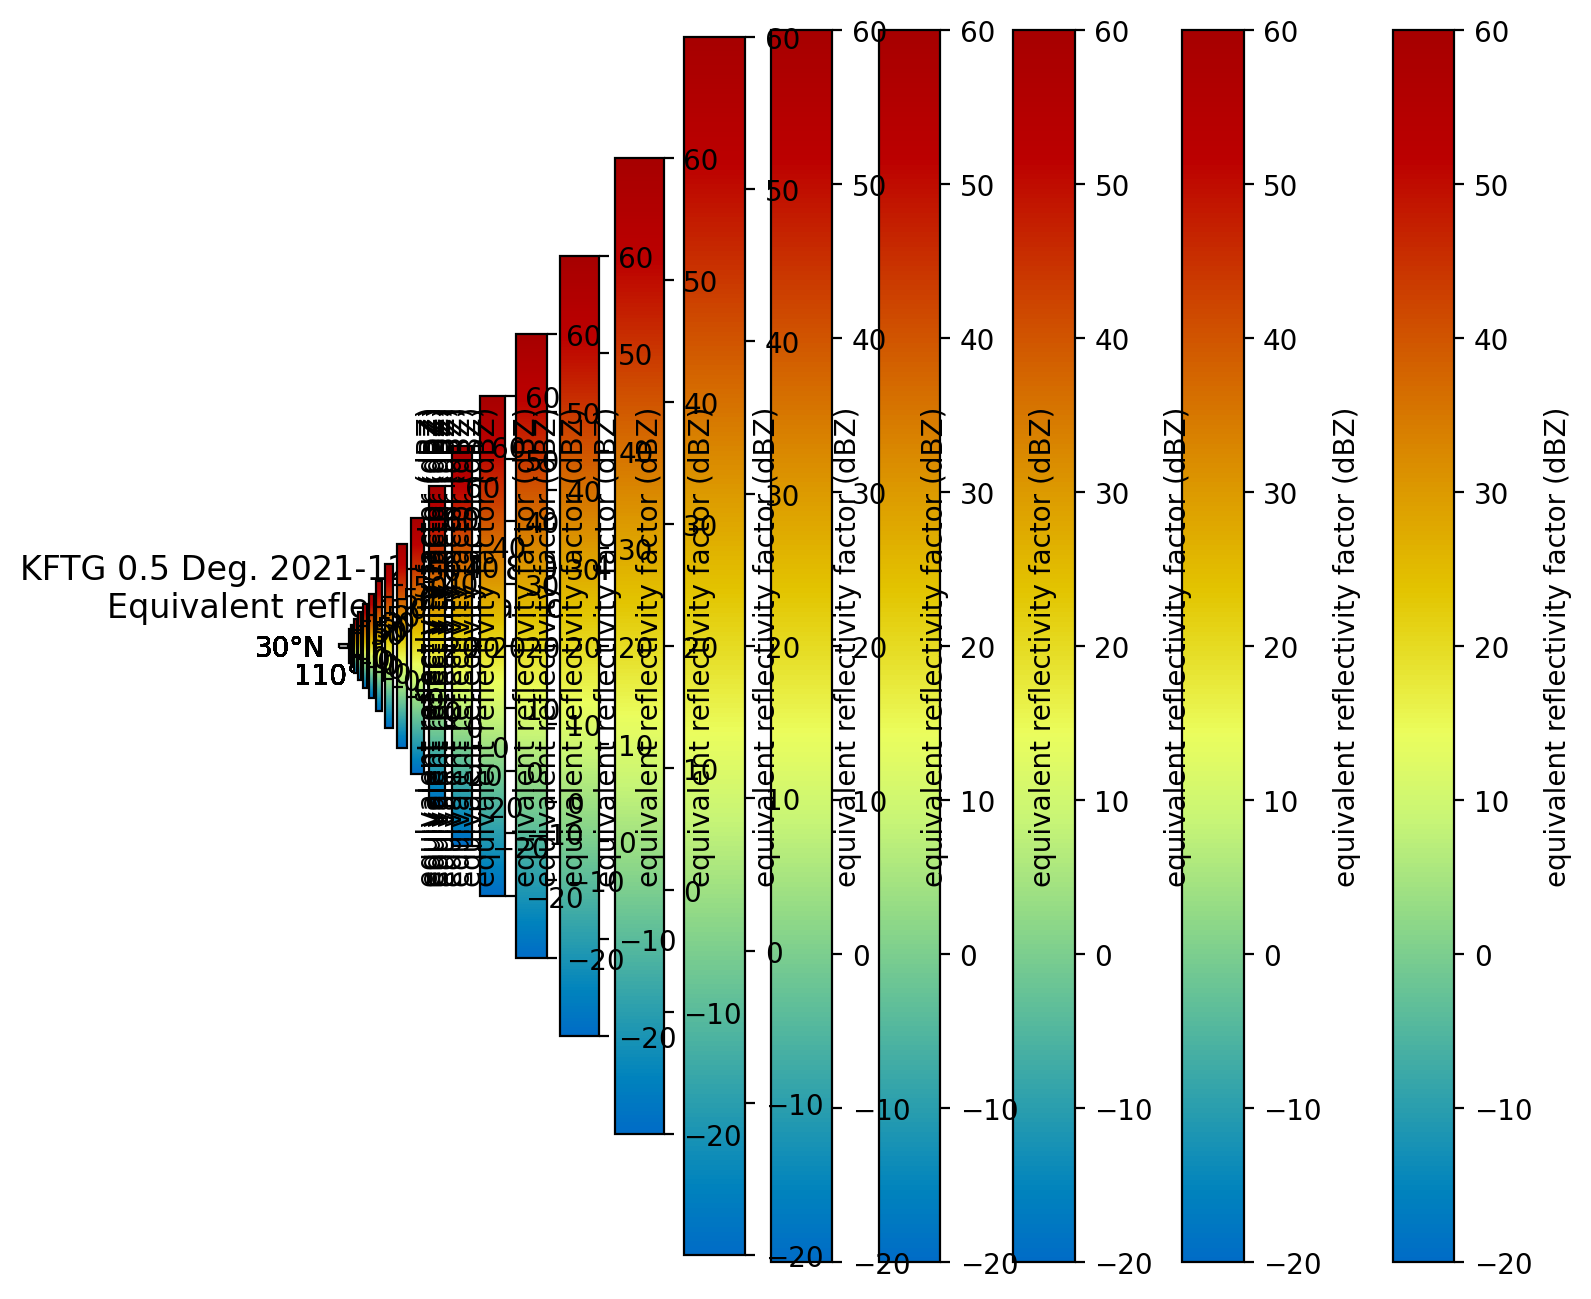

In [84]:
fig = plt.figure(figsize=(8,8),dpi=200)
ax = plt.subplot(1,1,1,projection=ccrs.PlateCarree())

for i in range(len(radar_data)):
    print(f'Plotting radar {i+1} of {len(radar_files)}')
    display = pyart.graph.RadarMapDisplay(radar_data[i])
    display.plot_ppi_map('reflectivity',sweep=0,ax=ax,vmin=-20,vmax=60)
    if i>20:
        break